# Exploring 3D Sinusoidal Data | Artificial Neural Networks
## Applied Machine Learning

## Name: Kevin Veeder

## Overview

The purpose of this project was to experiment with artificial neural networks for solving a basic regression problem using noisy 3D sinusoidal data. The goal was to explore how different hyperparameters affect a model’s predictions, and to ultimately build a neural network that captures the underlying trend in the data smoothly and accurately.

I used a lightweight Sequential model that trains quickly on the provided dataset, which allowed me to manually adjust hyperparameters and observe their influence on performance. This was an exploratory, hands-on process—adjusting values, training the model, reviewing the prediction curve, and repeating until I identified a reasonable configuration. In short: a good old-fashioned manual hyperparameter sweep.

The objective was to build and fine-tune a model that could predict a curve that closely fits the underlying signal, with minimal noise and erratic behavior. In the end, the model should produce a smooth and coherent prediction line when plotted alongside the training data.

### Note on Visualization
Smoother prediction curves can result not just from improved models, but also from thoughtful data sorting before plotting. For example, sorting by input value to minimize the arc length of the prediction curve can improve visualization. While that optimization wasn’t a primary focus here, I made sure to generate a clean figure that shows the model’s prediction line superimposed on the original data.

Here are a few of the hyperparameters I experimented with during the process:

- number of nodes per layer
- number of layers
- activation functions
- normalization method (should be negligible)
- number of epochs
- learning rate
- loss function

You’ll know the model is performing well when the prediction curve aligns closely with the trend of the data. Initially, the line plot of the model’s predictions may look erratic. If that happens, switching to a scatter plot of the predictions can help diagnose the issue—usually related to the input data not being sorted. Once resolved, I finalized the project with a connected line plot that clearly visualizes the learned function.

### Evaluation
To evaluate the model's performance, I also calculated the generalization error on a held-out test set.

## Preliminaries

Let's import some common packages:

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
    from mpl_toolkits.mplot3d import Axes3D
    # split dataframe into X, Y, Z
    x = data_df['x']
    y = data_df['y']
    z = data_df['z']
    fig = plt.figure(figsize=[18, 10])
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    # first subplot
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.view_init(0, 90)
    ax.scatter3D(x, y, z, c=z, cmap='Blues');
    ax.set_xlabel('x',fontdict=font)
    ax.set_ylabel('y',fontdict=font)
    ax.set_zlabel('z',fontdict=font)
    # second subplot
    ax = fig.add_subplot(2, 2, 2, projection='3d')
    ax.view_init(90, 0)
    ax.scatter3D(x, y, z, c=z, cmap='Blues');
    ax.set_xlabel('x',fontdict=font)
    ax.set_ylabel('y',fontdict=font)
    ax.set_zlabel('z',fontdict=font)
    # third subplot
    ax = fig.add_subplot(2, 2, 3, projection='3d')
    ax.view_init(45, 45)
    ax.scatter3D(x, y, z, c=z, cmap='Blues');
    ax.set_xlabel('x',fontdict=font)
    ax.set_ylabel('y',fontdict=font)
    ax.set_zlabel('z',fontdict=font)
    # 4th subplot
    ax = fig.add_subplot(2, 2, 4, projection='3d')
    ax.view_init(25, 75)
    ax.scatter3D(x, y, z, c=z, cmap='Blues');
    ax.set_xlabel('x',fontdict=font)
    ax.set_ylabel('y',fontdict=font)
    ax.set_zlabel('z',fontdict=font)

    plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
    plt.show()

    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    fig = plt.figure(figsize=[18, 10])
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    # first subplot
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.view_init(0, 90)
    ax.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap='Blues');
    ax.plot3D(fit_x, fit_y, fit_z, '-k');
    ax.set_xlabel('x',fontdict=font)
    ax.set_ylabel('y',fontdict=font)
    ax.set_zlabel('z',fontdict=font)
    # second subplot
    ax = fig.add_subplot(2, 2, 2, projection='3d')
    ax.view_init(90, 0)
    ax.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap='Blues');
    ax.plot3D(fit_x, fit_y, fit_z, '-k');
    ax.set_xlabel('x',fontdict=font)
    ax.set_ylabel('y',fontdict=font)
    ax.set_zlabel('z',fontdict=font)
    # third subplot
    ax = fig.add_subplot(2, 2, 3, projection='3d')
    ax.view_init(45, 45)
    ax.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap='Blues');
    ax.plot3D(fit_x, fit_y, fit_z, '-k');
    ax.set_xlabel('x',fontdict=font)
    ax.set_ylabel('y',fontdict=font)
    ax.set_zlabel('z',fontdict=font)
    # 4th subplot
    ax = fig.add_subplot(2, 2, 4, projection='3d')
    ax.view_init(25, 75)
    ax.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap='Blues');
    ax.plot3D(fit_x, fit_y, fit_z, '-k');
    ax.set_xlabel('x',fontdict=font)
    ax.set_ylabel('y',fontdict=font)
    ax.set_zlabel('z',fontdict=font)
    plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
    plt.show()
    


# Import, Split and Standardize Data

To get started, I'll begin by importing the dataset from a file named `3DSinusoidalANN.csv` and loading it into a DataFrame called `data`.

From there, I'll split the dataset into training and test sets using `train_test_split()`, with 20% of the data reserved for testing. Based on the structure of the dataset, it makes the most sense to treat the x and z columns as input features, and the y column as the target variable. I’ll assign the resulting splits to X_train, X_test, y_train, and y_test, and set random_state=42 to ensure the results are reproducible. I’ll continue using this random state value consistently throughout the notebook.

After the split, I’ll standardize the feature data using `StandardScaler()` to ensure the model trains more effectively. This will help normalize the input values, which is especially important when working with neural networks.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("3DSinusoidalANN.csv")
# data = data.sort_values(by=['z'])

x = data['x']
y = data['y']
z = data['z']

X = pd.DataFrame({
    'x': x,
    'z': z
})

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=42)

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

scaler_y = MinMaxScaler(feature_range = (-1.5, 1.5)).fit(pd.DataFrame(y_train))

y_train = scaler_y.transform(pd.DataFrame(y_train))
y_test = scaler_y.transform(pd.DataFrame(y_test))
y_valid = scaler_y.transform(pd.DataFrame(y_valid))

# Plot Data

Before moving on to model building, I’ll start by visualizing the training data to better understand its structure. To do this, I’ll define a custom function called `plot3Ddata`. This function will take a Pandas DataFrame containing three spatial coordinates and generate a 3D scatter plot using `scatter3D()` from Matplotlib.

I'll include the function definition in the earlier "Preliminaries" section of the notebook, keeping the cell below it reserved only for calling the function with the training dataset. At this point, I’ll avoid looking at the test set entirely—this helps ensure that my evaluation later on remains unbiased and focused on generalization.

To mirror the structure of the visualizations shown later in the notebook, I’ll create a figure with four subplots, each from a different viewing angle using `view_init()`. Each axis will be clearly labeled to match the expected format. This will give a well-rounded perspective of the training data in three dimensions.

In [3]:
train_df = pd.DataFrame({
    'x': X_train[:, 0],
    'y': y_train[:,0],
    'z': X_train[:, 1]
})

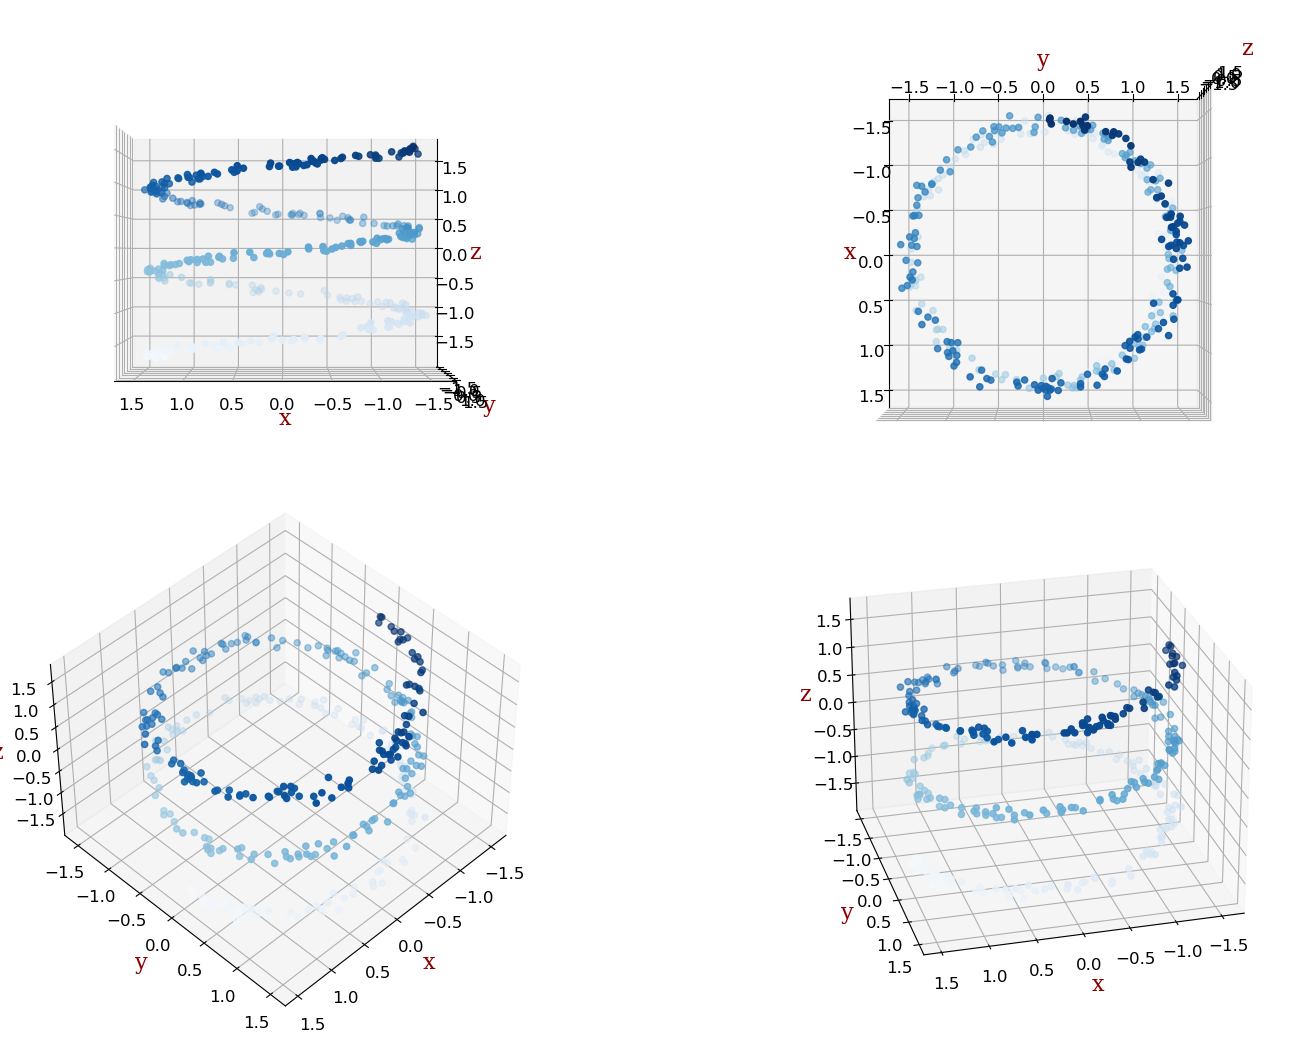

In [4]:
plot3Ddata(train_df)

## A Quick Note

Next, I’ll prepare for visualizing the model's predictions alongside the training data. To do this, I’ll complete the definition of a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)`, which is already scaffolded in the Preliminaries section of the notebook.

This function will take six NumPy arrays as input: three representing the x, y, and z coordinates of the model's predicted values (`fit_x`, `fit_y`, `fit_z`), and three representing the coordinates of the actual training data (`scat_x`, `scat_y`, `scat_z`). When called, it will generate a 3D scatter plot of the training data with the model’s predicted curve superimposed on top.

The completed function will be placed in the designated code cell in the Preliminaries section, and I’ll use it later in the notebook to visualize how well the model has learned the underlying pattern in the data. This will be key for assessing model fit and spotting any overfitting or erratic behavior before evaluating on the test set.

# Explore 3D Sinusoidal Data with Artifical Neural Networks

With the training data prepared and visualized, the next step will be to fit a `Sequential` model to the dataset. I’ll manually set the values for key hyperparameters, including the number of neurons per layer and the number of hidden layers in the network.

The plan is to experiment with different network configurations—adjusting these hyperparameters and observing how they impact the model’s performance. This hands-on tuning process will help identify a structure that models the data effectively.

Once I’ve found a configuration that produces a smooth and accurate fit to the training data, I’ll finalize that model and use it to calculate the generalization error in the next phase of the project.

In [5]:
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,
                                                  restore_best_weights=True)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[2,]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(80, activation='tanh'),
    keras.layers.Dense(80, activation='tanh'),
    keras.layers.Dense(1)
])

model.compile(loss = 'Huber', optimizer=keras.optimizers.Adam(learning_rate=0.008))

history = model.fit(X_train, y_train,
                    epochs=300, 
                    batch_size=200, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping_cb])

Epoch 1/300


C:\Users\kevve\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.7596 - val_loss: 0.4474
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5093 - val_loss: 0.5361
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4888 - val_loss: 0.4609
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4919 - val_loss: 0.4858
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4258 - val_loss: 0.5305
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4594 - val_loss: 0.5017
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4515 - val_loss: 0.4493
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4222 - val_loss: 0.4433
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4222 - val_loss: 0.4715
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4257 - val_loss: 0.4873
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4164 - val_loss: 0.4809
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4070 - val_loss: 0.4562
E

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0472 - val_loss: 0.0534
Epoch 71/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0450 - val_loss: 0.0569
Epoch 72/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0380 - val_loss: 0.0378
Epoch 73/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0306 - val_loss: 0.0231
Epoch 74/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0224 - val_loss: 0.0175
Epoch 75/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0183 - val_loss: 0.0212
Epoch 76/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0197 - val_loss: 0.0175
Epoch 77/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - val_loss: 0.0140
Epoch 78/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0157 - val_loss: 0.0255
Epoch 79/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0156 - val_loss: 0.0144
Epoch 80/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0155 - val_loss: 0.0160
Epoch 81/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0134 - val_loss: 

### Plot Model Predictions for Training Set

After finalizing the model, I’ll use its `predict()` method to generate predictions for the y values based on the x and z training inputs. Once I have the predicted outputs, I’ll visualize them alongside the original training data.

To do this, I’ll use the previously defined `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function. This will allow me to clearly compare the model’s prediction curve against the actual data in 3D space, helping to assess how well the network has learned the underlying pattern.

In [7]:
y_pred = model.predict(X_train)
y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[ 1.382307  ],
       [ 1.3478147 ],
       [ 0.9305923 ],
       [-1.3390226 ],
       [ 1.0855839 ],
       [ 0.6030176 ],
       [-1.2703333 ],
       [-1.1448557 ],
       [ 0.28109175],
       [ 0.31182885],
       [ 1.3752881 ],
       [ 1.0840849 ],
       [ 0.1678003 ],
       [ 1.2858893 ],
       [ 1.0467572 ],
       [-0.22525552],
       [ 0.8687113 ],
       [ 0.47328094],
       [ 0.5689226 ],
       [-1.0686786 ],
       [ 0.24083576],
       [ 0.5280413 ],
       [ 0.55867875],
       [-1.3769689 ],
       [ 1.3122096 ],
       [ 1.3713176 ],
       [ 1.3872917 ],
       [-0.41572902],
       [ 0.17713115],
       [ 1.0363495 ],
       [ 0.63306373],
       [-1.3714254 ],
       [-0.5873329 ],
       [ 0.3905378 ],
       [ 0.9975099 ],
       [ 0.31160653],
       [ 0.7196976 ],
       [ 0.97404766],
       [ 0.3877966 ],
       [-1.2759585 ],
       [ 0.48995322],
       [-0.37823617],
       [-0.23983482],
       [ 0.3726124 ],
       [ 0.43043688],
       [-0

In [8]:
fits_df = pd.DataFrame({
    'x': list(X_train[:, 0]),
    'y': list(y_pred[:, 0]),
    'z': list(X_train[:, 1])
})

fits_df_sorted = fits_df.sort_values(by='z', ascending=True)
 
fit_x = fits_df_sorted['x']
fit_y = fits_df_sorted['y']
fit_z = fits_df_sorted['z']

scat_df = pd.DataFrame({
    'x': list(train_df['x']),
    'y': list(train_df['y']),
    'z': list(train_df['z'])
})

scat_df_sorted = scat_df.sort_values(by='z', ascending=True)

scat_x = scat_df_sorted['x']
scat_y = scat_df_sorted['y']
scat_z = scat_df_sorted['z']

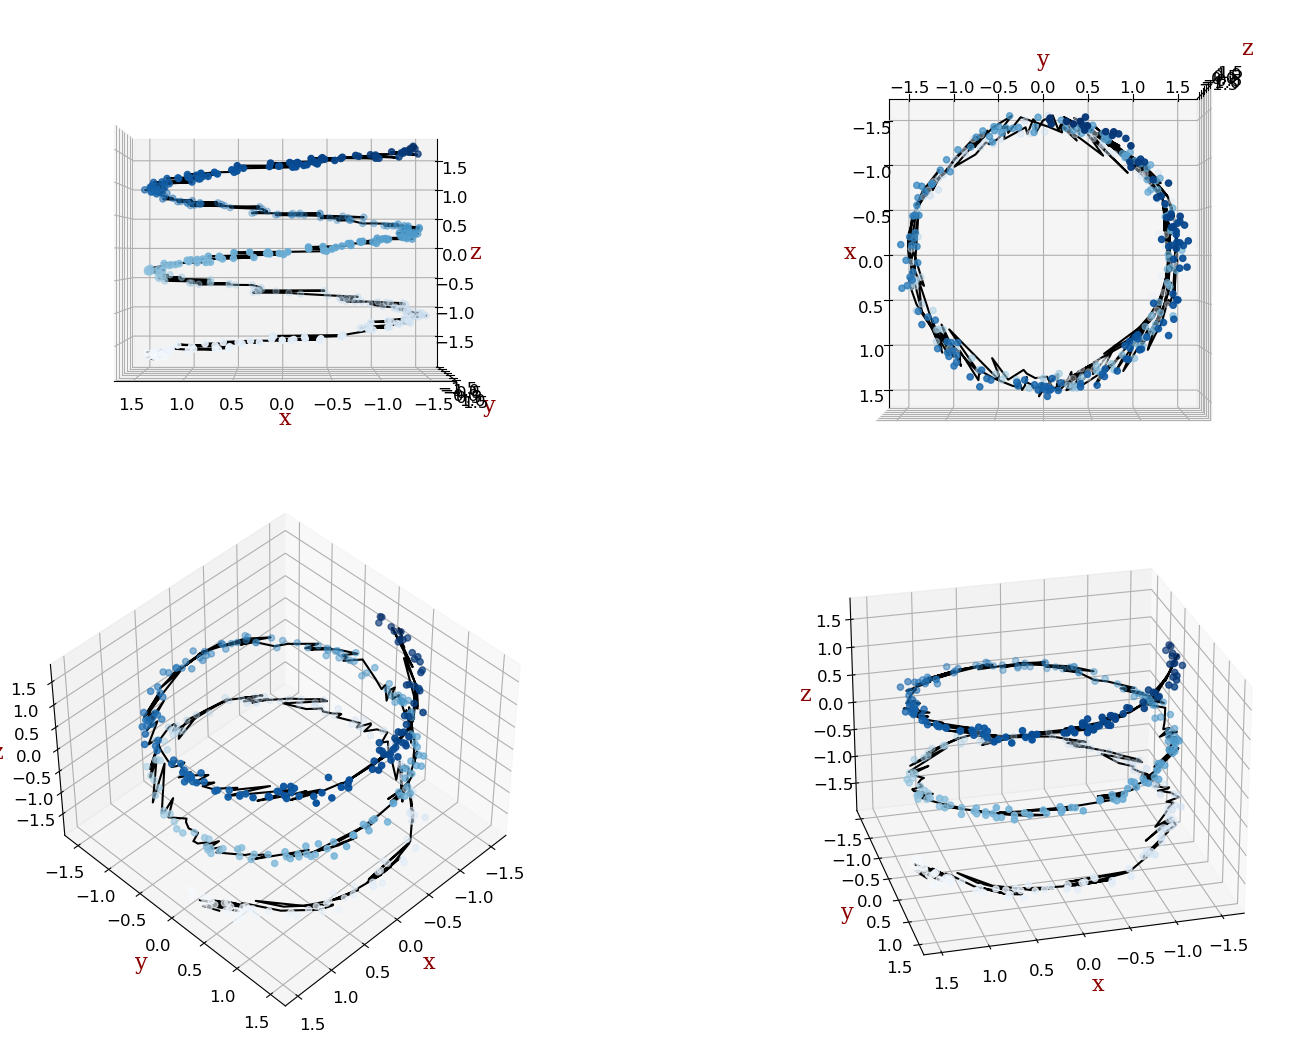

In [9]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Compute Generalization Error

To evaluate how well the model generalizes to unseen data, I’ll compute the generalization error using Mean Squared Error (MSE) as the evaluation metric. This will be calculated by comparing the model’s predictions on the test set with the actual test y values.

The resulting MSE score will be rounded to four decimal places for clarity and then printed. This final step will give a quantitative measure of the model's performance on data it hasn’t seen before, providing insight into its real-world predictive capability.

In [10]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 


0.008189760148525238

In [11]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)

mse_test = mean_squared_error(y_test, predictions).round(4)
print("Generalization Error: ", mse_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Generalization Error:  0.0164
